# I. Installing libraries
First, lets install/import the libraries we need.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# II. Exploring data
Next, lets take a look through the data to get an idea of what we're  working with

In [2]:
titanic_data = pd.read_csv("train.csv")

In [3]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

These columns correspond to the following:

* survival = survival | 0 = No, 1 = Yes
* pclass = ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd
* sex = sex
* age = age in years
* sibsp = number of siblings / spouses aboard the Titanic
* parch = number of parents / children aboard the Titanic
* tickets = ticket number
* fare = passenger fare
* cabin = cabin number
* embarked = port of embarkation | C = Cherbourg, Q = Queenstown, S = Southampton


In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Many of these are not types that our ML algorithms can work with, so we'll likely have to transform the data a bit. We can figure that out later after taking a closer look at our data.

In [7]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We seem to be missing a decent amount of data. Perhaps we can figure out what data to keep, clean, or modify.

In [8]:
total = titanic_data.isnull().sum().sort_values(ascending=False)
percent_1 = titanic_data.isnull().sum()/titanic_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '% Missing'])
missing_data

,Total,% Missing
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


It seems like Cabin, Age, and Embarked are the only columns with data points missing. Let's analyze them and try to see what we should do.

# III. Missing Data

### Fixing Cabin Column
With 77% of the Cabin data missing, it may not be worth trying to fill in the missing data. There are two simple options. 
* We can drop the entire column.
* We can fill in the missing cabin entries randomly.

I don't like the idea of randomly filling in so many data points, as I feel it could make our machine learning models worse. At this point, I feel that the best option is to drop the column.

In the future, it may be worth revisiting this to see if we can identify any trends between the Fare, Pclass, or Ticket columns and the Cabin column so that we can fill in the missing data less randomly and perhaps improve our model. For now, though, we will drop this column.


In [9]:
titanic_data = titanic_data.drop(['Cabin'], axis = 1)

### Fixing Age Column

In [10]:
titanic_data['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

We can see that even in the first 10 entries, some are not filled in. Perhaps we can fill in the missing data.

(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 44., 35., 35., 29.,
        16., 13., 10.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

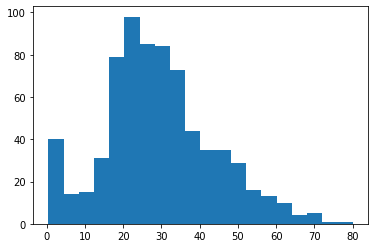

In [11]:
titanic_data_droppedna = titanic_data.dropna(axis=0)
plt.hist(titanic_data_droppedna['Age'], bins = 20)

It doesn't seem like our data is too skewed so we will use the median to fill in missing data points.

In [12]:
median_age = titanic_data_droppedna['Age'].median()
print(median_age)

28.0


In [13]:
titanic_data_fixed_ages_col = titanic_data['Age'].fillna(median_age)
titanic_data['Age'] = titanic_data_fixed_ages_col

Great, now all missing ages should have been replaced by the median age. Let's take a quick look to make sure.

In [14]:
titanic_data['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [15]:
titanic_data['Age'].isnull().sum()

0

Nice! The age column is now fixed. 

### Embarked

In [16]:
titanic_data['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [17]:
S = 0
C = 0
Q = 0
for data in titanic_data['Embarked']:
    if data == 'S':
        S = S + 1
    if data == 'C':
        C = C + 1
    if data == 'Q':
        Q = Q + 1
        
print("S: " + str(S) + ",\tC: " + str(C) + ",\tQ: " + str(Q))

S: 644,	C: 168,	Q: 77


S is by far the most common so we will use that to replace the two missing values.

In [18]:
titanic_data['Embarked'] = titanic_data['Embarked'].fillna('S')

Now our data should have no missing data points!

In [19]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [20]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# IV. Further Data Modification

### Unuseful Data
If we take a look at the PassengerID column, we can see that it likely has no relevance to survival rate, so it can be dropped.
Additionally, passenger name likely has no impact on survival, so the Name column can be dropped.
Lastly, the ticket number may have an impact on survival, however, immediate trends are not noticable. Thus, for now, the Ticket column will also be dropped, but this data can be explored futher later. 


In [21]:
titanic_data = titanic_data.drop(['PassengerId'], axis = 1)
titanic_data = titanic_data.drop(['Name'], axis = 1)
titanic_data = titanic_data.drop(['Ticket'], axis = 1)

Our new data set looks like the following.

In [22]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Non-Numeric Data

Next lets encode all the non-numeric data

In [23]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


We see that we need to convert Sex, Age, Fare, and Embarked.

### Sex

In [24]:
sex = {"male": 0, "female": 1}
titanic_data['Sex'] = titanic_data['Sex'].map(sex)

### Age

In [25]:
titanic_data['Age'] = titanic_data['Age'].astype(int)

It may be interesting to look at our new age spread with this modification.
Remember that we replaced all NaN entries with our median, 28.

You may notice that now our histogram reaches all the way down to 0, whereas it didn't previously. This is because some ages were labeled as decimals less than 1. These ages are now considered 0. (See entry 78 below).

In [26]:
titanic_data['Age'].head(80)

0     22
1     38
2     26
3     35
4     35
      ..
75    25
76    28
77    28
78     0
79    30
Name: Age, Length: 80, dtype: int64

(array([ 30.,  20.,  18.,  15.,  81.,  83.,  90., 268.,  69.,  54.,  39.,
         35.,  32.,  18.,  13.,  13.,   6.,   5.,   1.,   1.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40., 44., 48.,
        52., 56., 60., 64., 68., 72., 76., 80.]),
 <BarContainer object of 20 artists>)

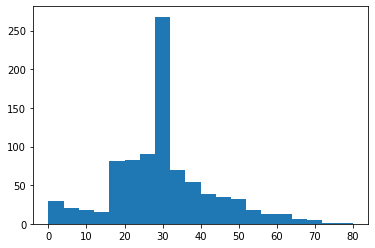

In [27]:
plt.hist(titanic_data['Age'], bins = 20)

### Fare

In [28]:
titanic_data['Fare'] = titanic_data['Fare'].astype(int)

### Embarked
Embarked is a little harder to encode than Sex, as there are three possible things that it could be.
We could encode S, Q, and C as 0, 1, and 2, but One-Hot Encoding could provide us with better results. Thus we will make three new columns to replace the Embarked column, each of which will only be filled with 0s or 1s.

In [29]:
s = {"S": 1, "Q": 0, "C" :0}
embarked_S = titanic_data['Embarked'].map(s)
embarked_S.rename("Embarked_S", inplace = True)

q = {"S": 0, "Q": 1, "C" :0}
embarked_Q = titanic_data['Embarked'].map(q)
embarked_Q.rename("Embarked_Q", inplace = True)

c = {"S": 0, "Q": 0, "C" :1}
embarked_C = titanic_data['Embarked'].map(c)
embarked_C.rename("Embarked_C", inplace = True)

modified_embarked = pd.concat([titanic_data['Embarked'], embarked_S, embarked_Q, embarked_C], axis=1)
modified_embarked

,Embarked,Embarked_S,Embarked_Q,Embarked_C
0,S,1,0,0
1,C,0,0,1
2,S,1,0,0
3,S,1,0,0
4,S,1,0,0
...,...,...,...,...
886,S,1,0,0
887,S,1,0,0
888,S,1,0,0
889,C,0,0,1


Now we can see that we have properly encoded the Embarked data. All we need to do is drop the current Embarked column and append these new ones it its place.

In [30]:
titanic_data = titanic_data.drop(['Embarked'], axis = 1)
titanic_data = pd.concat([titanic_data, embarked_S, embarked_Q, embarked_C], axis=1)
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_Q,Embarked_C
0,0,3,0,22,1,0,7,1,0,0
1,1,1,1,38,1,0,71,0,0,1
2,1,3,1,26,0,0,7,1,0,0
3,1,1,1,35,1,0,53,1,0,0
4,0,3,0,35,0,0,8,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,1,0,0
887,1,1,1,19,0,0,30,1,0,0
888,0,3,1,28,1,2,23,1,0,0
889,1,1,0,26,0,0,30,0,0,1


In [31]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    891 non-null    int64
 1   Pclass      891 non-null    int64
 2   Sex         891 non-null    int64
 3   Age         891 non-null    int64
 4   SibSp       891 non-null    int64
 5   Parch       891 non-null    int64
 6   Fare        891 non-null    int64
 7   Embarked_S  891 non-null    int64
 8   Embarked_Q  891 non-null    int64
 9   Embarked_C  891 non-null    int64
dtypes: int64(10)
memory usage: 69.7 KB


Great! Now all our data is useable and properly encoded for ML models.

# VI: Machine Learning Models

### Decision Tree

We can start with a simple Decision Tree model.

In [32]:
y = titanic_data.Survived
titanic_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_Q', 'Embarked_C']
X = titanic_data[titanic_features]
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_Q,Embarked_C
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.345679,0.523008,0.381594,31.785634,0.725028,0.086420,0.188552
std,0.836071,0.477990,13.028212,1.102743,0.806057,49.703730,0.446751,0.281141,0.391372
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.000000,1.000000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.000000,1.000000,1.000000,1.000000


In [33]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
titanic_model = DecisionTreeClassifier(random_state = 0)
titanic_model.fit(train_X, train_y)
val_predictions = titanic_model.predict(val_X)

In [34]:
score = titanic_model.score(val_X, val_y)
print("The forest model currently predicts correctly " + str(round(score, 6)*100) + "% of the time.")

The forest model currently predicts correctly 79.3722% of the time.


### Random Forest

Next, we can try a random forest model.

In [35]:
from time import *
forest_model = RandomForestClassifier(random_state=0)

start_time = time()
forest_model.fit(train_X, train_y)
end_time = time()
forest_predictions = forest_model.predict(val_X)

elapsed_time = end_time - start_time
print("Time to train model: %.3f seconds" % elapsed_time)

Time to train model: 0.139 seconds


Right now this has a worse prediction rate than our decision tree. We may be able to improve it with hyperparameter tuning.

In [36]:
score = forest_model.score(val_X, val_y)
print("The forest model currently predicts correctly " + str(round(score, 6)*100) + "% of the time.")

The forest model currently predicts correctly 82.0628% of the time.


In [37]:
cm = confusion_matrix(val_y, forest_predictions)
cm

array([[120,  19],
       [ 21,  63]])

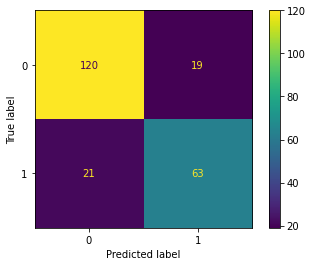

In [38]:
cmdisplay = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = forest_model.classes_)
cmdisplay.plot()

In [39]:
importances = pd.DataFrame({'feature':train_X.columns,'importance':np.round(forest_model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Age,0.291
Sex,0.287
Fare,0.192
Pclass,0.097
SibSp,0.052
Parch,0.039
Embarked_S,0.017
Embarked_C,0.016
Embarked_Q,0.008


<AxesSubplot:xlabel='feature'>

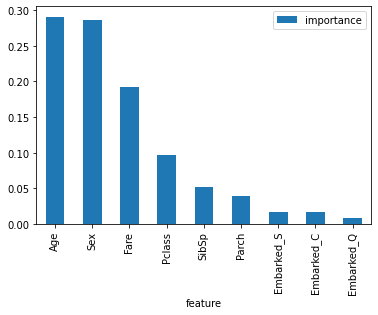

In [40]:
importances.plot.bar()

Now it looks like the port embarked from doesn't benefit the model much. We will drop those columns and retrain the model.

In [41]:
titanic_data_without_embarked = titanic_data

titanic_data_without_embarked = titanic_data_without_embarked.drop(["Embarked_S"], axis = 1)
titanic_data_without_embarked = titanic_data_without_embarked.drop(["Embarked_Q"], axis = 1)
titanic_data_without_embarked = titanic_data_without_embarked.drop(["Embarked_C"], axis = 1)
titanic_data_without_embarked

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22,1,0,7
1,1,1,1,38,1,0,71
2,1,3,1,26,0,0,7
3,1,1,1,35,1,0,53
4,0,3,0,35,0,0,8
...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13
887,1,1,1,19,0,0,30
888,0,3,1,28,1,2,23
889,1,1,0,26,0,0,30


In [42]:
y = titanic_data_without_embarked.Survived
titanic_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = titanic_data_without_embarked[titanic_features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(train_X, train_y)
forest_predictions = forest_model.predict(val_X)

Let's see if our model has improved at all after removing Embarked.

In [43]:
new_score = forest_model.score(val_X, val_y)
print("The forest model previously predicted correctly " + str(round(score, 6)*100) + "% of the time.")
print("The forest model now predicts correctly " + str(round(new_score, 6)*100) + "% of the time.")
print("By removing the embarked feature, our model predicts correctly " + str(round((new_score - score), 6)*100) + "% more often.")

The forest model previously predicted correctly 82.0628% of the time.
The forest model now predicts correctly 82.5112% of the time.
By removing the embarked feature, our model predicts correctly 0.4484% more often.


In [44]:
prev_cmdisplay = cmdisplay
cm = confusion_matrix(val_y, forest_predictions)
cm

array([[122,  17],
       [ 22,  62]])

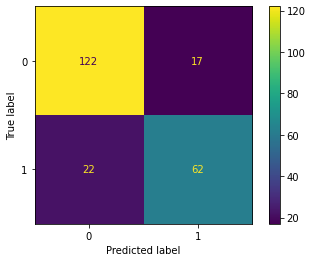

In [45]:
cmdisplay = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = forest_model.classes_)
cmdisplay.plot()

Interesting. It seems as though removing the Embarked feature made a minor improvement in our correct prediction rate.

# VII: Hyperparameter Tuning

Let's see if we can improve our model by doing some Hyperparameter Tuning.
### Randomized Search CV

We'll start with a Randomized Search CV.

In [46]:
forest_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [48]:
rf = RandomForestClassifier(random_state = 0)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_X, train_y)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [49]:
def evaluate(model, test_features, test_labels):
    accuracy = model.score(test_features, test_labels)
    return accuracy

base_accuracy = evaluate(forest_model, val_X, val_y)
print('Base Performance:')
print('Correct Prediction %: = ' + str((round(base_accuracy, 6) *100)))

print()

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, val_X, val_y)
print('Random Performance:')
print('Correct Prediction %: = ' + str((round(random_accuracy, 6) *100)))

print()

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Base Performance:
Correct Prediction %: = 82.5112

Random Performance:
Correct Prediction %: = 85.6502

Improvement of 3.80%.


It look like our model has improved. Let's see if we can improve it further.

### Grid Search CV

Next we'll use a Grid Search CV to try to narrow in on the parameters identified in the randomized search.

In [50]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [800, 1000, 1200],
    'min_samples_split': [4, 6, 8],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_depth': [5, 10, 20, 40],
    'bootstrap': ['True']
}
# Create a based model
rf = RandomForestClassifier(random_state = 0)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(train_X, train_y)
grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


{'bootstrap': 'True',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 1000}

In [51]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, val_X, val_y)
print('Grid Performance:')
print('Correct Prediction %: = ' + str((round(grid_accuracy, 6) *100)))

Grid Performance:
Correct Prediction %: = 82.0628


In [52]:
print('Further improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - random_accuracy) / base_accuracy))
print('Overall improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Further improvement of -4.35%.
Overall improvement of -0.54%.


For some reason this actually made our model less effective. Perhaps this is because we are working with a relatively small dataset.

# VIII: Conclusions

### Results
* In the end, we were able to predict passenger survival with around 85.65% accuracy.
* The most important predictors of survival were Age, Sex, and Fare.

### Challenges
* This was my first time working in Python or Machine Learning, so I had to learn all about Python syntax, libraries like pandas and matplotlib, and Jupyter Notebooks to have this project come together.
* There was a good amount of missing or hard to use data that I had to figure out how to handle.
* I was a bit confused between Regression and Classification problems at the beginning. I thought this problem was a regression problem then realized that I should be using a classifier instead. This meant I had to switch from using the MAE metric to using a confusion matrix to identify my model's accuracy.
* Some models didn't work as expected. For example, I expected the Grid CV to provide higher prediction accuracy than the Random CV, but it didn't.

### Improvements
* In the future, try to remove less data. For example, instead of entirely removing Name, Ticket, or Cabin, use Feature Engineering to make use of the data we do have. Perhaps try to extract Ms. vs Mr. from the Name category, or try to predict a passenger's cabin based on Fare, Pclass, and Embarked.
* Try to optimize the model for accuracy, precision, or recall with the confusion matrix and see how that affects predictions.